## CONTEXT
Diabetes is a chronic (long-lasting) health condition that causes a person's blood sugar level to become too high. 
With a relatively long asymptomatic phase, early intervention is very important in stopping the progression and damages of Diabetes. The early diagnosis of diabetes is only possible by proper assessment of certain factors and symptoms.

## AIM
With this project I want to build a model that predict if a patient is at risk to be diagnosed to have diabetes or not based on a list of some factors and early symptoms. I then built a web app to deploy my model using Flask and Heroku.

## DATASET

The dataset has been downloaded from  [UCI Machine Learning Repository ](https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#) and it is has been collected in 2020 using direct questionnaires of 520 patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by a doctor.

The dataset consists of total 16 features and one target variable named class.

#### Features

1. Age: Age in years
2. Gender: Male / Female
3. Polyuria: Yes / No
4. Polydipsia: Yes/ No
5. Sudden weight loss: Yes/ No
6. Weakness: Yes/ No
7. Polyphagia: Yes/ No
8. Genital Thrush: Yes/ No
9. Visual blurring: Yes/ No
10. Itching: Yes/ No
11. Irritability: Yes/No
12. Delayed healing: Yes/ No
13. Partial Paresis: Yes/ No
14. Muscle stiffness: yes/ No
15. Alopecia: Yes/ No
16. Obesity: Yes/ No

#### Target

Class: Positive / Negative


#### Relevant Paper:

[Islam, MM Faniqul, et al. 'Likelihood prediction of diabetes at early stage using data mining techniques.' Computer Vision and Machine Intelligence in Medical Image Analysis. Springer, Singapore, 2020. 113-125](https://link.springer.com/chapter/10.1007/978-981-13-8798-2_12)

## Importing packages and loading dataset

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
diabetes = pd.read_csv('diabetes_data_upload.csv')
diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


## Exploratory Data Analysis (EDA) with Pandas and NumPy

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

We can observe that the data set contain 520 rows and 17 columns. All the columns are categorical except for the column Age.

In [4]:
diabetes.isnull().sum() # not necessary in this case since we can see from info that there are not null elelemnts.

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Because this project aim to an early prediction, we will choose cases of age up to 65 years.

In [5]:
diabetes.drop(diabetes[diabetes['Age'] > 65].index, inplace = True)
diabetes.shape

(469, 17)

In [6]:
# Display number of values of each column

display(diabetes['Age'].value_counts(bins = 3).to_frame()) # need to be sorted
print('\n')

# Building a useful function to display information of all the column with just few lines of code

for i in diabetes.drop('Age', axis = 1).columns:
    display(diabetes[i].value_counts().to_frame())
    #print()

,Age
"(32.333, 48.667]",235
"(48.667, 65.0]",181
"(15.950000000000001, 32.333]",53


,Gender
Male,292
Female,177


,Polyuria
No,248
Yes,221


,Polydipsia
No,262
Yes,207


,sudden weight loss
No,271
Yes,198


,weakness
Yes,270
No,199


,Polyphagia
No,272
Yes,197


,Genital thrush
No,368
Yes,101


,visual blurring
No,278
Yes,191


,Itching
No,255
Yes,214


,Irritability
No,365
Yes,104


,delayed healing
No,265
Yes,204


,partial paresis
No,278
Yes,191


,muscle stiffness
No,308
Yes,161


,Alopecia
No,320
Yes,149


,Obesity
No,390
Yes,79


,class
Positive,285
Negative,184


‘Class’ is the target to predict, which says if the patient is diabetic or not. Positive means the person is diabetic and Negative means a person is not. Out of the 469 persons, 285 are labeled as Positive (non-diabetic) and 184 as Negative (diabetic)

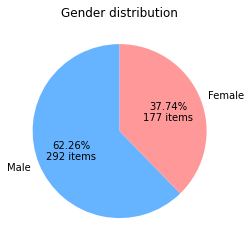

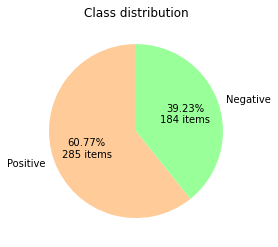

In [7]:
# Defining a function to plot a simple pie chart


def plotPie(value, title, label,colors):
    plt.figure(figsize=(4,4))
    plt.pie(
        value.value_counts(),
        startangle=90,
        labels = label,
        autopct=(lambda p:f'{p:.2f}%\n{p*sum(value.value_counts())/100 :.0f} items'),
        colors = colors
    )
    plt.title(title)
    plt.show()




plotPie(diabetes['Gender'], "Gender distribution", ["Male", "Female"],['#66b3ff','#ff9999'])
plotPie(diabetes['class'], "Class distribution", ["Positive", "Negative"],['#ffcc99','#99ff99'])

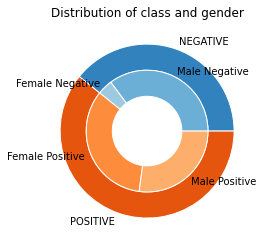

class     Gender
Negative  Male      165
          Female     19
Positive  Female    158
          Male      127
Name: Gender, dtype: int64

In [8]:
fig, ax = plt.subplots()

size = 0.3

cmap = plt.get_cmap("tab20c")  # The tab20c colormap has 4 shades per hue
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1,2,5,6])

ax.pie(diabetes['class'].value_counts(ascending = True), labels=['NEGATIVE','POSITIVE'], radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(diabetes.groupby('class')['Gender'].value_counts(), labels = ['Male Negative', 'Female Negative', 'Female Positive', 'Male Positive'], radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Distribution of class and gender')
plt.show()

diabetes.groupby('class')['Gender'].value_counts()


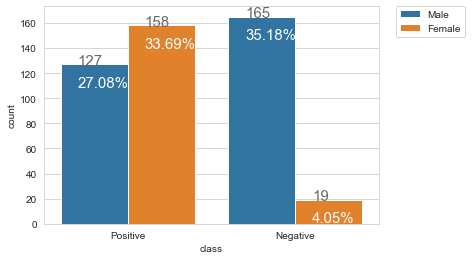

In [9]:
# Visualisation of the distrubution of positive and negative cases by gender

sns.set_style('whitegrid')

ax = sns.countplot('class',hue ='Gender',data = diabetes)
plt.legend(['Male','Female'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height()-18, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='white')
for i in  ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height()-.5, \
            str(i.get_height()), fontsize=15,
                color='dimgrey')
#print(totals)


The dataset is __imbalanced__ and this is something to take in consideration while building the model.

In [10]:

positive = diabetes.loc[diabetes['class'] == 'Positive'] # people with a positive diagnosis of diabetes
negative = diabetes.loc[diabetes['class'] == 'Negative'] # people with a negative diagnosis of diabetes

negativeM = negative.loc[negative['Gender'] == 'Male']   # male with a negative diagnosis
negativeF = negative.loc[negative['Gender'] == 'Female'] # female with a negative diagnosis

positiveM = positive.loc[positive['Gender'] == 'Male']   # male with a positive diagnosis
positiveF = positive.loc[positive['Gender'] == 'Female'] # female with a positive diagnosis

In [11]:
negativeF

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
315,33,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
316,55,Female,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Negative
317,36,Female,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,Negative
318,28,Female,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,Negative
319,34,Female,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Negative
320,65,Female,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
321,34,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
330,51,Female,No,No,No,No,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative
331,59,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Negative
332,50,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


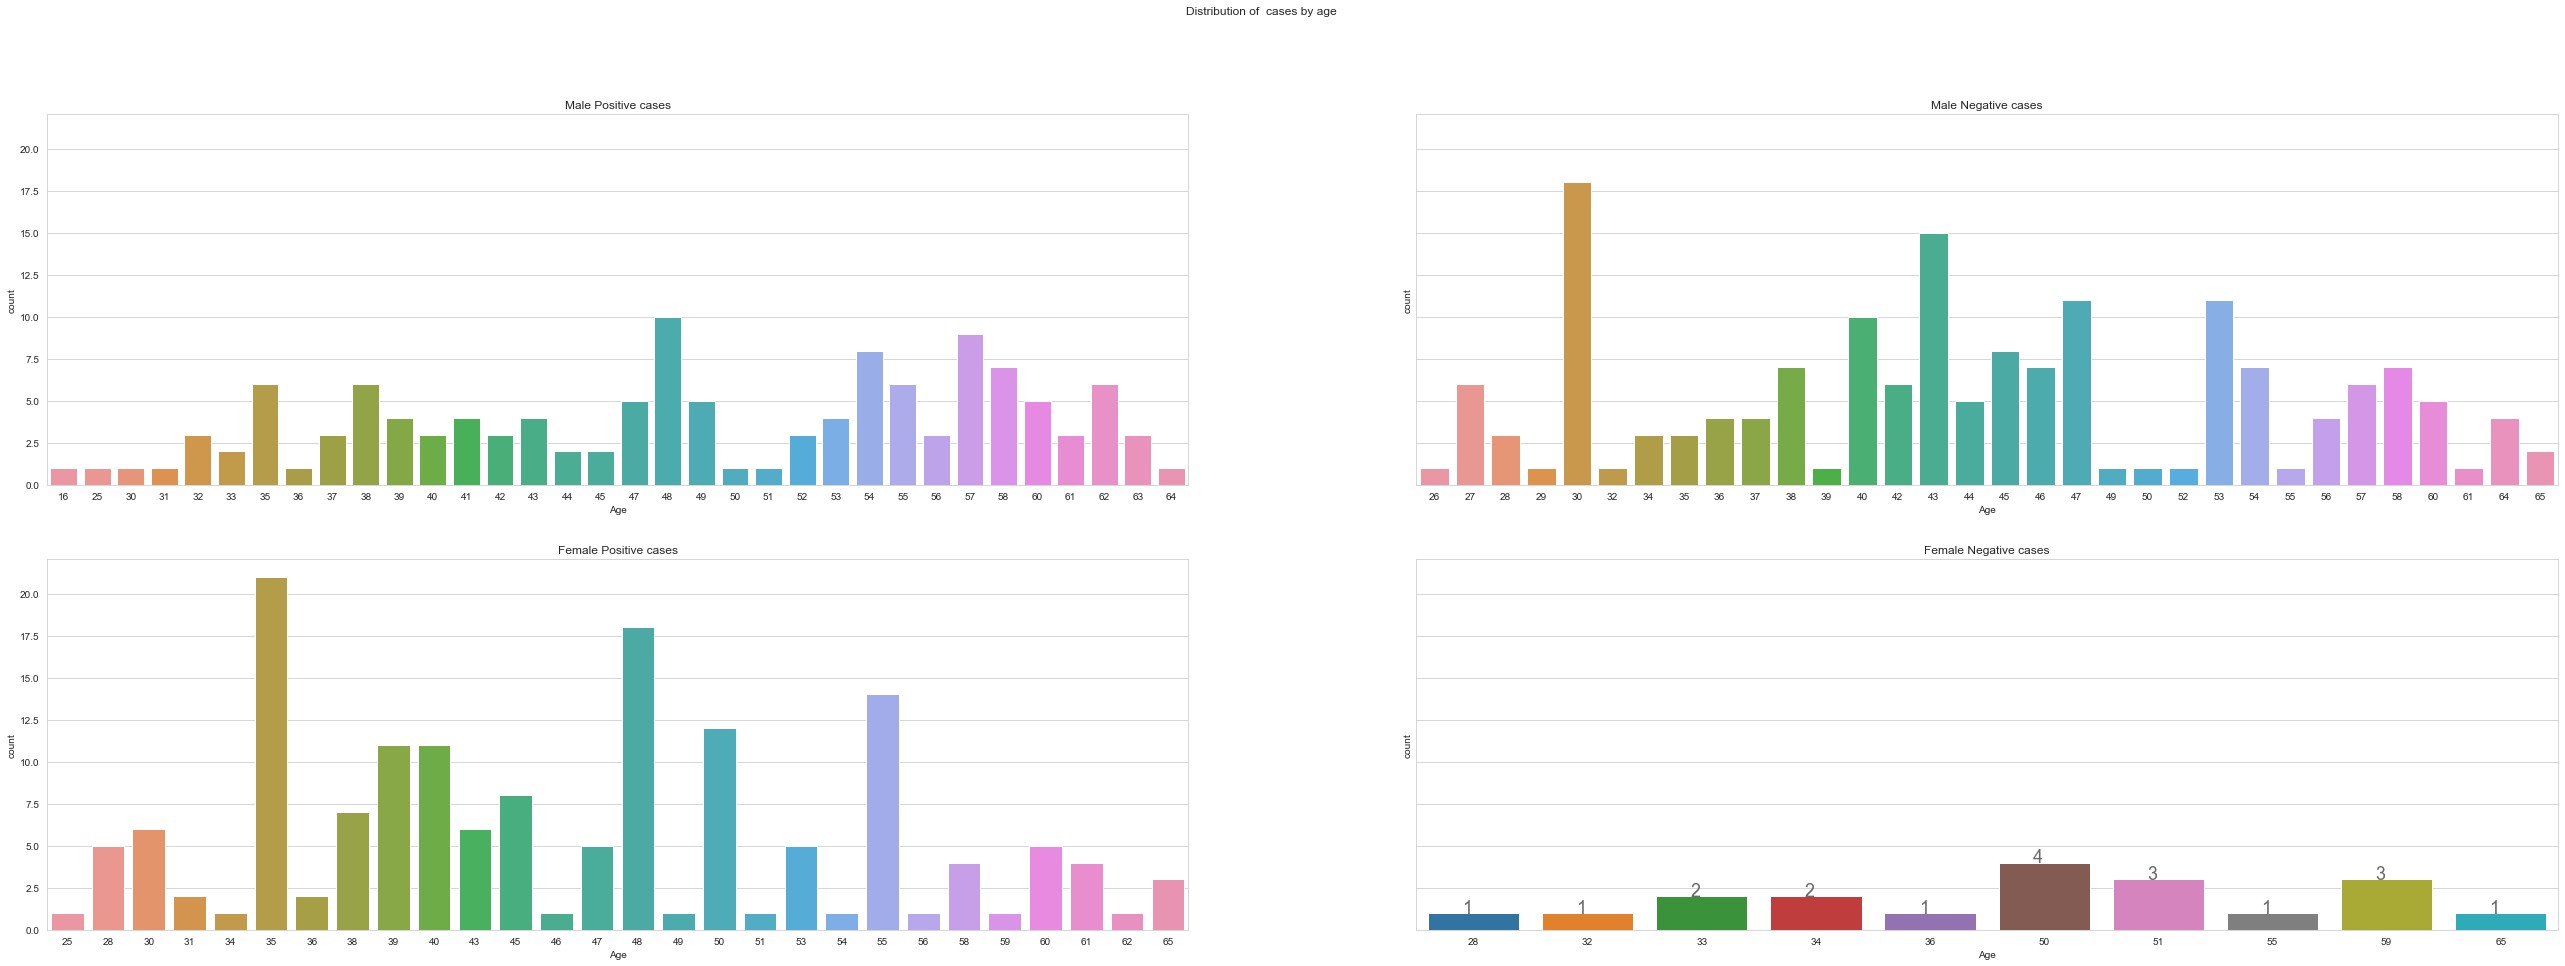

In [12]:
fig, axes = plt.subplots(2, 2,  figsize=(45,15), sharey = True)
fig.suptitle('Distribution of  cases by age')
axes[0,0].set_title('Male Positive cases')
axes[0,1].set_title('Male Negative cases')
axes[1,0].set_title('Female Positive cases')
axes[1,1].set_title('Female Negative cases')

sns.set_style('whitegrid')
sns.countplot('Age', data = positiveM, ax = axes[0,0])
sns.countplot('Age', data = negativeM, ax = axes[0,1])
sns.countplot('Age', data = positiveF, ax = axes[1,0])

ax = sns.countplot('Age', data = negativeF, ax = axes[1,1])
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list

for i in  ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.3, i.get_height(), \
            str(i.get_height()), fontsize=18,
                color='dimgrey')

In order to build a model I need to transform my categorical values in the following:
   - Male = 1
   - Female = 0
   - Yes = 1 
   - No = 0
   - Positive = 1
   - Negative = 0

In [13]:
# Applying dummies to the dataset to convert the categorical elements in numbers

d = pd.get_dummies(diabetes.drop(['Age'], axis = 1), drop_first = True)
d.columns = list(diabetes.drop(['Age'], axis = 1).columns)
diab = pd.concat([d, diabetes['Age']], axis = 1)
diab

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,40
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,58
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,41
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,45
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,39
516,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,48
517,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,58
518,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,32


## Train, test and  split

In [14]:
X = diab.drop(['class'], axis = 1)

y = diab['class']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42) #, stratify = y) 
#stratify parameter will preserve the proportion of target as in original dataset, in the train and test datasets as well.

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

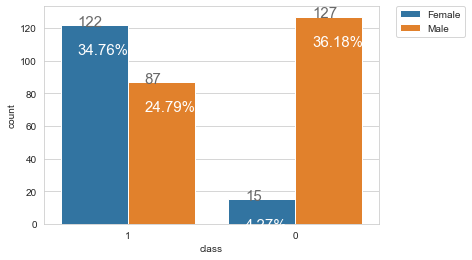

In [17]:
# Visualisation of the distrubution of positive and negative cases by gender

sns.set_style('whitegrid')
diab_train = pd.concat([X_train,y_train], axis = 1)
ax = sns.countplot('class',hue ='Gender',data = diab_train, order = [1, 0])

plt.legend(['Female','Male'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height()-18, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='white')
for i in  ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height()-.5, \
            str(i.get_height()), fontsize=15,
                color='dimgrey')
#ax.set_xticklabels('Positive','Negative')
#print(totals)

## SMOTE

I will use a sampling technique called Synthetic Minority Oversampling Technique (SMOTE) to apply synthetic sampling on the training data only and not on the test data in order to be sure to have original data while testing. 


In [18]:
 diab_train = pd.concat([X_train, y_train], axis = 1)
#diab_train_F = diab_train.loc[diab_train['Gender'] == 0]
#diab_train_M = diab_train.loc[diab_train['Gender'] == 1]


In [19]:


from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

sm = SMOTE()
#X_trainF_sm, y_trainF_sm = sm.fit_resample(diab_train_F.drop(['class'],axis = 1),diab_train_F['class'])

# print(f'''Shape of X_trainF before SMOTE: {diab_train_F.drop(['class'],axis = 1).shape}
# Shape of X_trainF after SMOTE: {X_trainF_sm.shape}''')

X_train_sm, y_train_sm = sm.fit_resample(diab_train.drop(['class'],axis = 1),diab_train['class'])

print(f'''Shape of X_train before SMOTE: {diab_train.drop(['class'],axis = 1).shape}
Shape of X_train after SMOTE: {X_train_sm.shape}''')


Shape of X_train before SMOTE: (351, 16)
Shape of X_train after SMOTE: (418, 16)


In [20]:
# diab_train_sm_F = pd.concat([X_trainF_sm,y_trainF_sm], axis = 1)
#diab_train_sm = pd.concat([diab_train_M, diab_train_sm_F])

diab_train_sm = pd.concat([X_train_sm,y_train_sm], axis = 1)

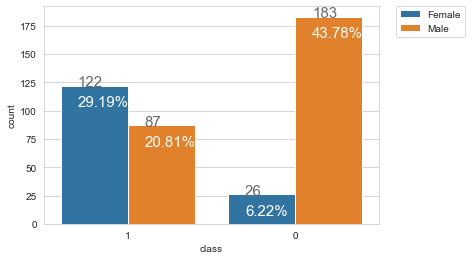

In [21]:
# Visualisation of the distrubution of positive and negative cases by gender

sns.set_style('whitegrid')

#ax = sns.countplot('class',hue ='Gender',data = diab_train, order = [1, 0])
ax = sns.countplot('class',hue ='Gender',data = diab_train_sm, order = [1, 0])
plt.legend(['Female','Male'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height()-18, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='white')
for i in  ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height()-.5, \
            str(i.get_height()), fontsize=15,
                color='dimgrey')
#ax.set_xticklabels('Positive','Negative')
#print(totals)

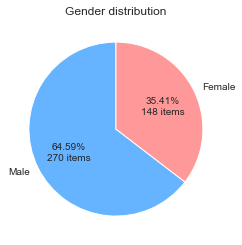

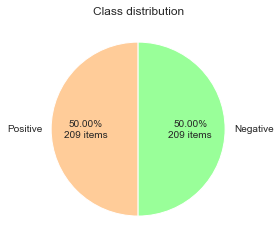

In [22]:
plotPie(diab_train_sm['Gender'], "Gender distribution", ["Male", "Female"],['#66b3ff','#ff9999'])
plotPie(diab_train_sm['class'], "Class distribution", ["Positive", "Negative"],['#ffcc99','#99ff99'])

In [23]:
diab_train_smF = diab_train_sm.loc[diab_train_sm['Gender'] == 0]
diab_train_smM = diab_train_sm.loc[diab_train_sm['Gender'] == 1]

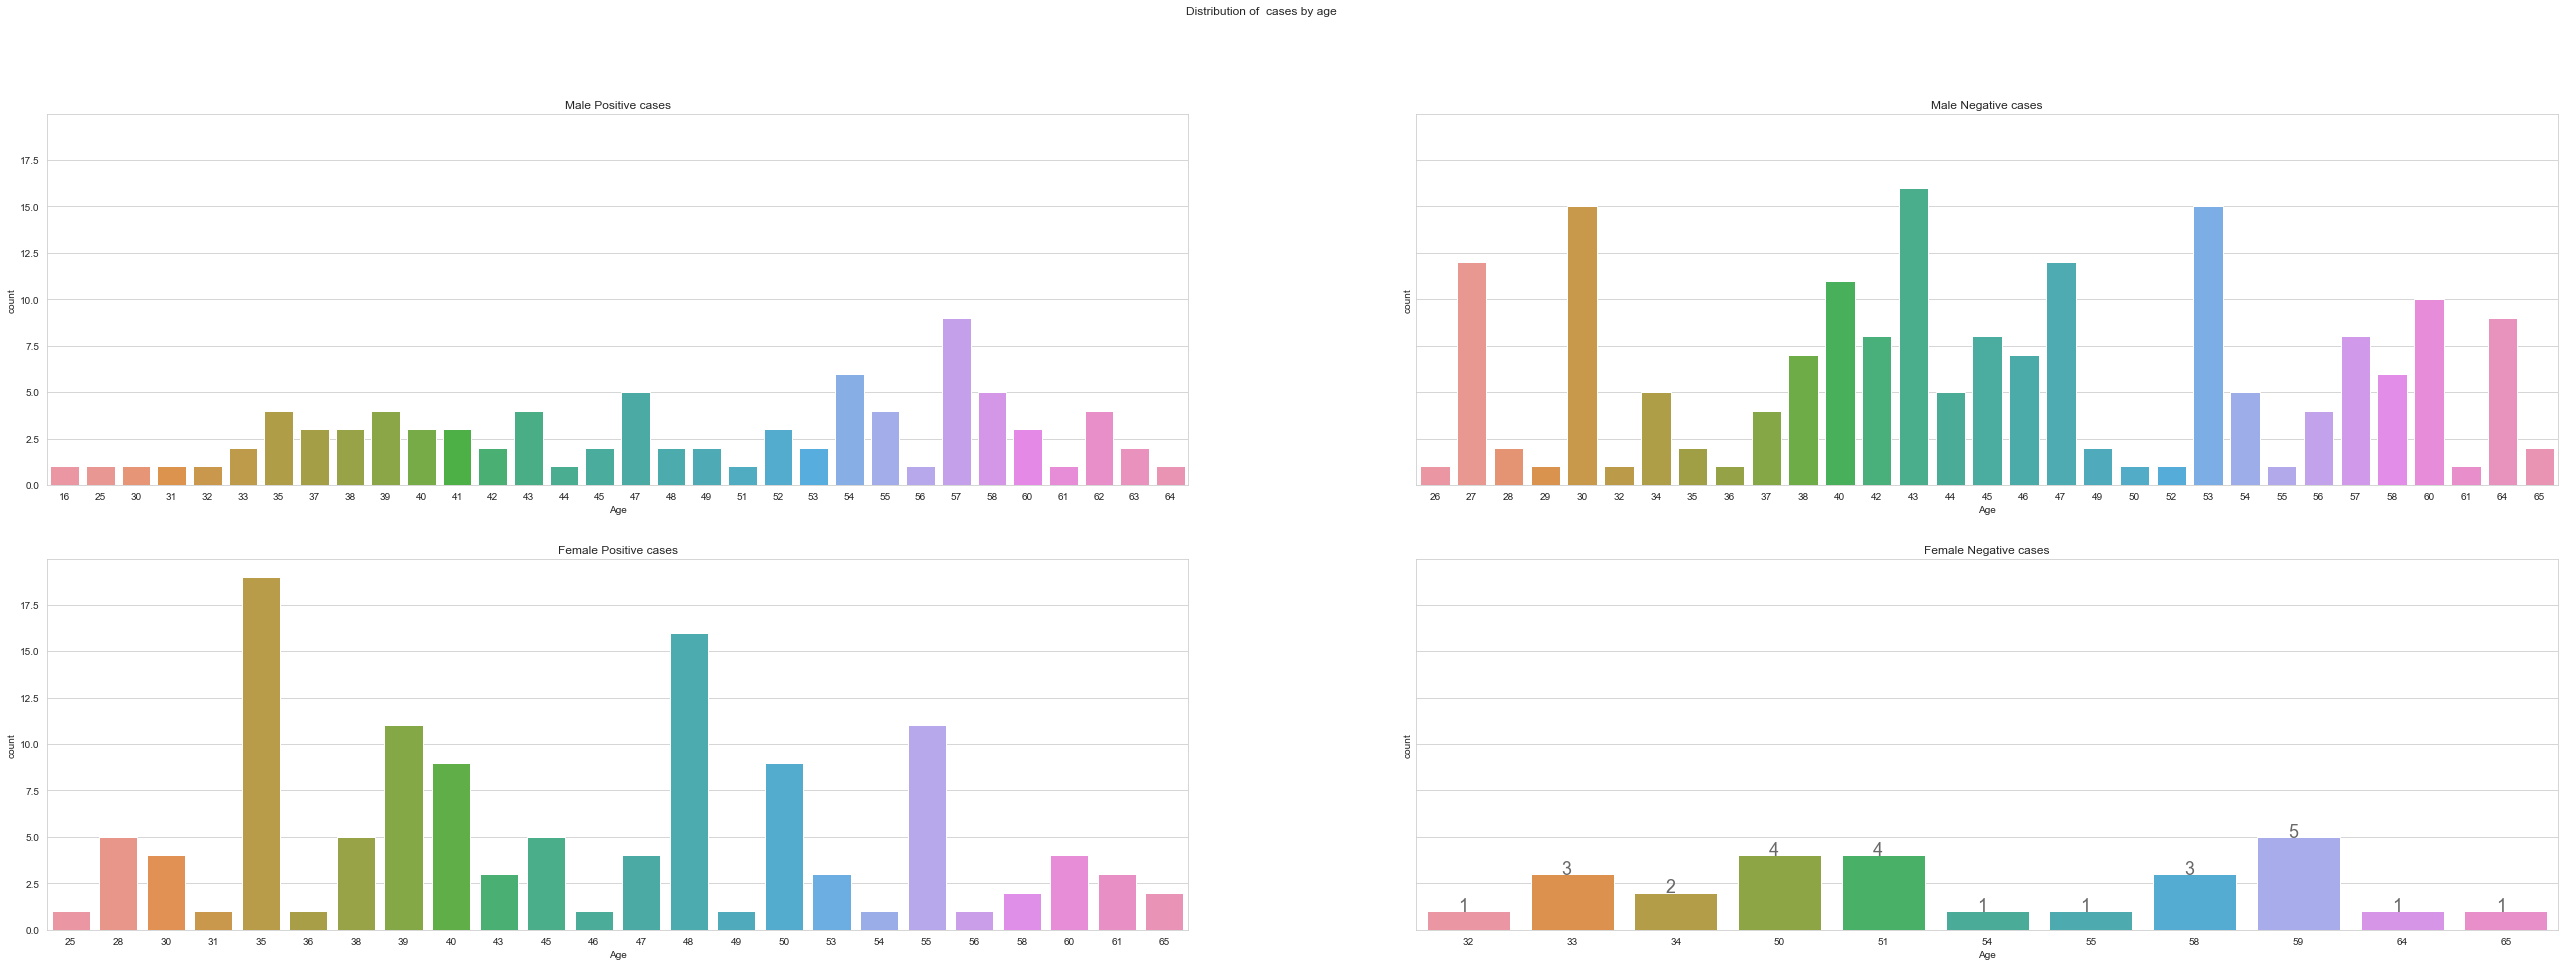

In [24]:
fig, axes = plt.subplots(2, 2,  figsize=(45,15), sharey = True)
fig.suptitle('Distribution of  cases by age')
axes[0,0].set_title('Male Positive cases')
axes[0,1].set_title('Male Negative cases')
axes[1,0].set_title('Female Positive cases')
axes[1,1].set_title('Female Negative cases')

sns.set_style('whitegrid')
sns.countplot('Age', data = diab_train_smM.loc[diab_train_smM['class'] == 1], ax = axes[0,0])
sns.countplot('Age', data = diab_train_smM.loc[diab_train_smM['class'] == 0], ax = axes[0,1])
sns.countplot('Age', data = diab_train_smF.loc[diab_train_smF['class'] == 1], ax = axes[1,0])

ax = sns.countplot('Age', data = diab_train_smF.loc[diab_train_smF['class'] == 0], ax = axes[1,1])
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list

for i in  ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.3, i.get_height(), \
            str(i.get_height()), fontsize=18,
                color='dimgrey')

In [25]:
# diab_train_sm['class'].value_counts() # data diabetes balanced with SMOTE

In [26]:
X_train = diab_train_sm.drop(['class'], axis = 1)
y_train = diab_train_sm['class']
y_train

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    0
415    0
416    0
417    0
Name: class, Length: 418, dtype: uint8

In [27]:
#sns.pairplot(diab,hue='class',palette='bwr')

Now I will use the scikit-learn library to perform machine learning predictions. The scikit-learn workflow consists of four main steps:

- Create the specific machine learning model I want to use
- Fit the model to the training data
- Use the model to make predictions
- Evaluate the accuracy of the predictions

## Logistic regression model

The first model I will use is Logistic Regression, which is often the first model to train when performing classification.

In [28]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear') # because the dataset is not so big, the logistic regression model would be automatically be lbfgs (linear Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm). But it gives me error in performace, so I forced the model liblinear (Library for Large Linear Classification)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.91      0.93        76

    accuracy                           0.92       118
   macro avg       0.90      0.92      0.91       118
weighted avg       0.92      0.92      0.92       118

[[39  3]
 [ 7 69]]


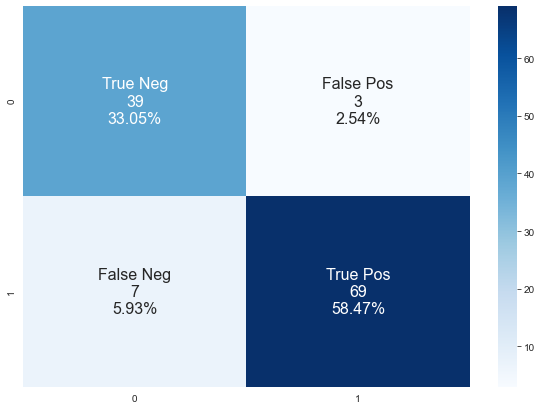

In [29]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

cnf = confusion_matrix(y_test, predictions)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf.flatten()/np.sum(cnf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 7))
 
sns.heatmap(cnf, annot=labels, fmt='',  cmap='Blues', annot_kws={"fontsize":16})

In [30]:
score = logmodel.score(X_test,y_test)
print('Test Accuracy Score',score)

Test Accuracy Score 0.9152542372881356


In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
accuracy = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, y_train,cv=3)
accuracy

array([0.9       , 0.89208633, 0.96402878])

In [33]:
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 91.87050359712231


## Random Forest model

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0], dtype=uint8)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        76

    accuracy                           0.98       118
   macro avg       0.99      0.98      0.98       118
weighted avg       0.98      0.98      0.98       118

[[40  2]
 [ 0 76]]


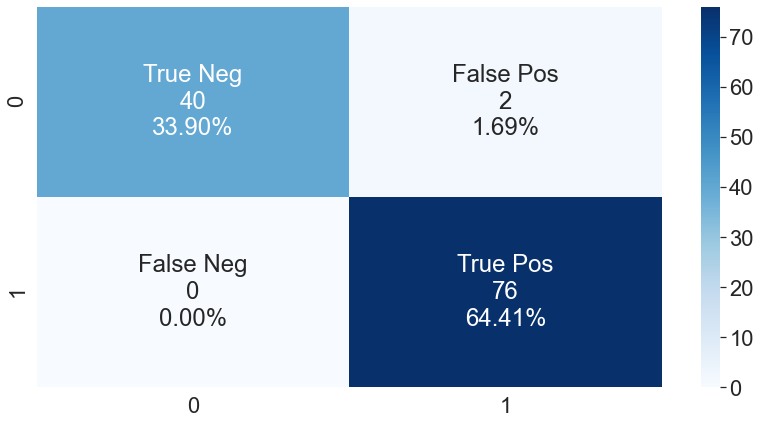

In [36]:
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

cnf = confusion_matrix(y_test, rfc_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf.flatten()/np.sum(cnf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(14, 7))
sns.set(font_scale=2) 
sns.heatmap(cnf, annot=labels, fmt='',  cmap='Blues')

In [37]:
score = RandomForestClassifier.score(rfc, X_test,y_test)
print('Test Accuracy Score',score)

Test Accuracy Score 0.9830508474576272


In [38]:
accuracy = cross_val_score(RandomForestClassifier(n_estimators=100), X_train, y_train,cv=3)
accuracy

array([0.95714286, 0.97122302, 0.99280576])

In [39]:
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 97.37238780404248


In [40]:
df = pd.DataFrame(X_test).reset_index()
df

,index,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Age
0,230,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,35
1,293,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,53
2,170,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,49
3,299,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,43
4,21,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,57,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,53
114,481,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,53
115,82,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0,50
116,402,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,43


In [41]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Polyuria,0.274692
Polydipsia,0.200641
Age,0.089238
Gender,0.087924
partial paresis,0.071506
sudden weight loss,0.049377
Alopecia,0.035806
Polyphagia,0.034140
Irritability,0.027160
delayed healing,0.026082


## Gradient boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
from sklearn.model_selection import KFold

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
# kf = KFold(n_splits=3,random_state=101,shuffle=True)
# for train_index,val_index in kf.split(X):
#     X_train,X_val = X.iloc[train_index],X.iloc[val_index],
#     y_train,y_val = y.iloc[train_index],y.iloc[val_index]

In [46]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [47]:
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier()

In [48]:
y_pred = gradient_booster.predict(X_test)

In [49]:
#print(classification_report(y_test,y_pred))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.53%


In [50]:
score = GradientBoostingClassifier.score(gradient_booster, X_test,y_test)
print('Test Accuracy Score',score)

Test Accuracy Score 0.9745762711864406


In [51]:
accuracy = cross_val_score(GradientBoostingClassifier(learning_rate=0.1), X_train, y_train,cv=3)
accuracy

array([0.95      , 0.97122302, 1.        ])

In [52]:
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 97.37410071942446


### Conclusions

Random forest gives a better prediction, based on accuracy of the model resulting from the cross validation of the training data.

Deploy a web-app could be useful to check if symptoms suggest a possible early diagnosis of diabetes. It could be used for triage purposes in medical environment or for private use for a self-check. 

### Load the model for deployment

In [53]:
import pickle

In [54]:
# Saving model to disk
#pickle.dump(logmodel, open('model.pkl','wb'))
pickle.dump(rfc, open('model.pkl','wb'))
#pickle.dump(gradient_booster, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47]]))  # show a prediction for given input

# 0 = Negative, 1 = Positive

[1]


### Further improvement

- It would be useful to work with a bigger dataset in order to improve the predictive model.
- Would be nice to create a nice  web-app. An idea could be the use of Heroku or Streamlit.
- Working on understanding and evaluating which combinations of symptoms and factors give higher percentage of positive prediction.